In [1]:
import pandas as pd 
df = pd.read_csv('total_data_na.csv')
df.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Drop duplicates
df.drop_duplicates(inplace=True)

# Encoding
encoder = LabelEncoder()
player_encoded = encoder.fit_transform(df['PLAYER'])
df['PLAYER'] = player_encoded

# df.replace('-',np.nan,inplace=True)
# # Replace missing values with the mean of the column
# imputer = SimpleImputer(strategy='mean')
# df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# # Normalization
# print("After Normalization :")
# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df.head()
# Select relevant features for clustering
X= df[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]

X.replace('-', np.nan, inplace=True)
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


/tmp/ipykernel_213164/3937019985.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)


In [3]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(features_scaled)


/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12, random_state=42)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(features_scaled)

centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

labels = kmeans.labels_
print("\nLabels:")
print(labels)


Centroids:
[[ 0.21285693  0.53417477  0.34680174  0.28723146  0.55603584 -0.1600461
   0.00553937 -0.88183644 -0.75698935  0.         -1.01879256 -1.19525003
  -1.04636282]
 [-0.50046143 -0.54017673 -0.45058281 -0.51949627 -0.36357766 -0.1600461
  -0.43622554  0.48857749  0.42680737  0.          0.57099546  0.68530401
   0.59020988]
 [ 2.24070575  1.79176269  1.69793966  2.18947406  0.80143018  1.18622403
   2.32368507 -0.79978095 -0.72616725  0.         -0.95899101 -1.20758319
  -1.00508236]]

Labels:
[0 2 0 0 0 2 1 1 1 1 1 1 0 1 2 2 1 1 1 0 1 0 1 0 1 1 2 1 0 0 0 1 1 1 1 0 0
 0 1 1 2 1 2 0 0 0 1 1 2 1 0 0 0 1 1 0 1 1 1 1 1 2 0 0 1 0 0 1 0 1 1 1 0 2
 0 0 0 2 0 1 2 1 2 1 0 1 2 0 1 1 2 2 1 1 1 2 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
identified_clusters = kmeans.fit_predict(features_scaled)
identified_clusters

array([0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

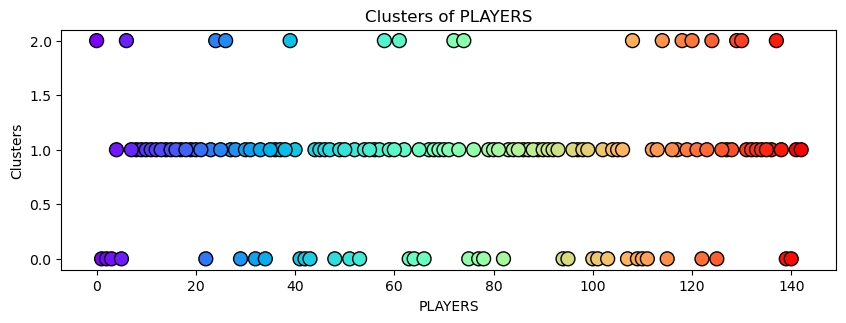

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['PLAYER'], labels, c=data_with_clusters['PLAYER'], cmap='rainbow', s=100,edgecolors='black')

plt.title('Clusters of PLAYERS')
plt.xlabel('PLAYERS')
plt.ylabel('Clusters')

plt.show()


Silhouette Score for 2 clusters: 0.42447470554644867
Silhouette Score for 3 clusters: 0.37159189257627384
Silhouette Score for 4 clusters: 0.3502604315707096
Silhouette Score for 5 clusters: 0.3636699898874859
Silhouette Score for 6 clusters: 0.3517954059728362
Silhouette Score for 7 clusters: 0.36894750659633324
Silhouette Score for 8 clusters: 0.3210915515878592
Silhouette Score for 9 clusters: 0.3332587057457005
Silhouette Score for 10 clusters: 0.3443872587817972
Silhouette Score for 11 clusters: 0.33847603194018483
Silhouette Score for 12 clusters: 0.32468048115421605
Silhouette Score for 13 clusters: 0.33339490547186224
Silhouette Score for 14 clusters: 0.334375922681478
Silhouette Score for 15 clusters: 0.32338131804704945
Silhouette Score for 16 clusters: 0.31939833702551546
Silhouette Score for 17 clusters: 0.32796082655068254
Silhouette Score for 18 clusters: 0.3182491052935456
Silhouette Score for 19 clusters: 0.3019891926997713


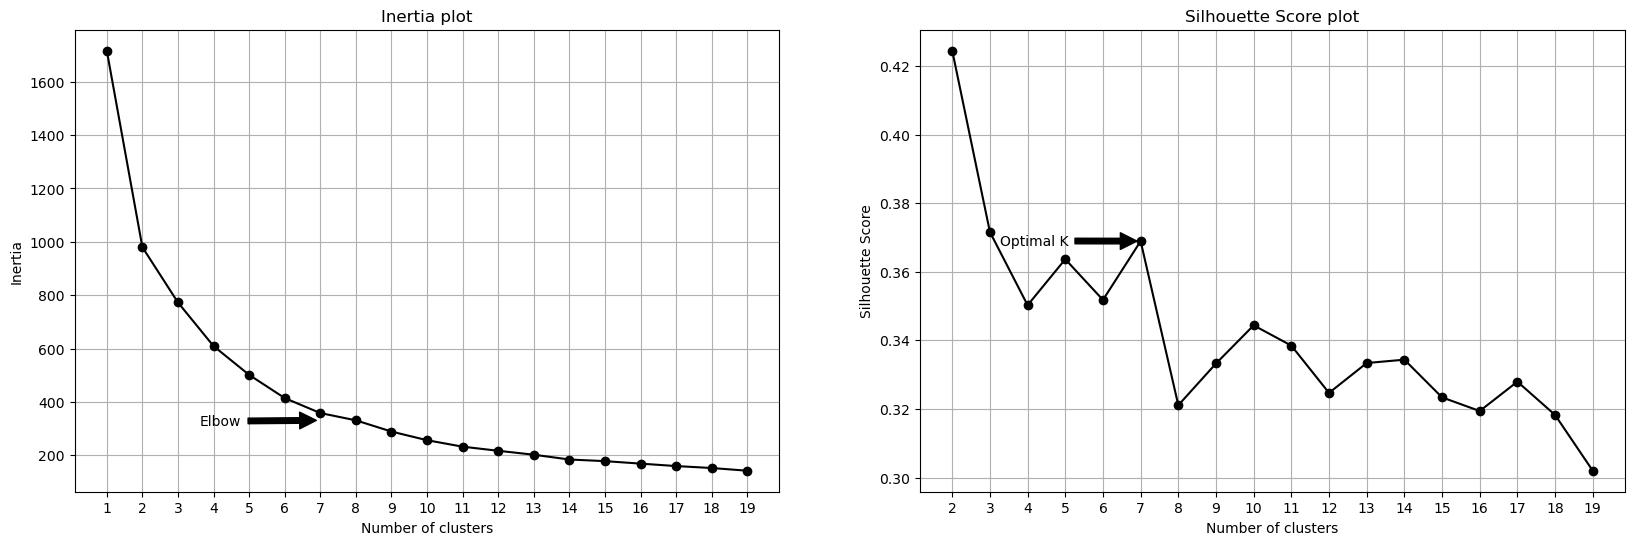

In [7]:


# number_clusters = range(1,20)
# plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)
# plt.figure(figsize=(10, 6))
# plt.plot(number_clusters, sse, marker='o', color='black')
# plt.grid(True)
# plt.xticks(number_clusters)
# plt.annotate('Elbow', xy=(7, sse[4]), xytext=(0.5, 0.5), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.title('Inertia plot')
# plt.show()


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sse = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000)
  kmeans.fit(features_scaled)
  sse.append(kmeans.inertia_)
# Calculate silhouette scores for different K
sil_scores = []
for k in range(2, 20):  # silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    sil_scores.append(score)

for k in range(2, 20):
    print(f'Silhouette Score for {k} clusters: {sil_scores[k-2]}')
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))




# Elbow method plot
number_clusters = range(1, 20)
ax1.plot(number_clusters, sse, marker='o', color='black')
ax1.grid(True)
ax1.set_xticks(number_clusters)
ax1.annotate('Elbow', xy=(7, sse[7]), xytext=(0.1, 0.2), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Inertia plot')

# Silhouette method plot
ax2.plot(range(2, 20), sil_scores, marker='o', color='black')
ax2.grid(True)
ax2.set_xticks(range(2, 20))
ax2.annotate('Optimal K', xy=(7, sil_scores[5]), xytext=(0.5, 0.5), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score plot')

plt.show()



In [8]:

kmeans = KMeans(n_clusters = 7, random_state=42)
kmeans.fit(features_scaled)


centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)


labels = kmeans.labels_
print("\nLabels:")
print(labels)

Centroids:
[[-0.69659099 -0.86442075 -0.79901617 -0.69952085 -1.0040016  -0.1600461
  -0.489542   -0.24816406 -0.33763471  0.          0.48834191  0.91663505
   0.39870088]
 [ 2.40124739  2.48279507  1.5910798   2.14174904  0.93884772  5.56160197
   1.76307822 -0.48640659 -0.53138874  0.         -0.56160887 -0.84025546
  -0.58468825]
 [-0.0126198   0.26571912  0.21981466 -0.06618024  0.94960455 -0.1600461
  -0.29150945  1.19453177  1.10603499  0.          0.36389779  0.45763342
   0.5267713 ]
 [ 2.05212609  1.49559277  1.5812091   2.094891    0.72522398 -0.1600461
   2.32912125 -0.89620383 -0.7860991   0.         -1.08126244 -1.3206071
  -1.1344344 ]
 [-0.72597586 -0.96535032 -0.94453528 -0.7373089  -1.08904849 -0.1600461
  -0.489542    1.35066055  1.60817827  0.          0.17872666  0.42399145
   0.33193491]
 [ 0.15621543  0.50881851  0.33092665  0.22072118  0.55914596 -0.1600461
  -0.06947296 -0.88096568 -0.75522512  0.         -1.01500651 -1.18765263
  -1.04102515]
 [-0.32640081 -0.

/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


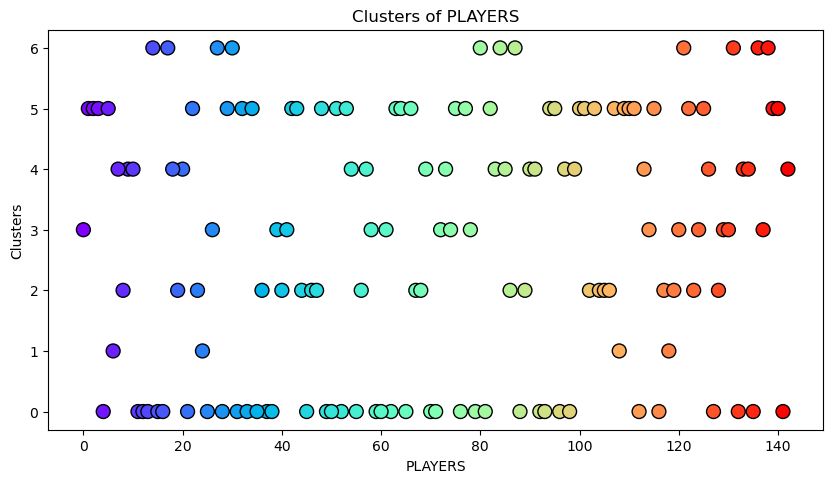

In [9]:

identified_clusters = kmeans.fit_predict(features_scaled)
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters

fig = plt.figure(figsize=(10,5))

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['PLAYER'], labels, c=data_with_clusters['PLAYER'], cmap = 'rainbow', s=100,edgecolors='black')

plt.title('Clusters of PLAYERS')
plt.xlabel('PLAYERS')
plt.ylabel('Clusters')

plt.show()

In [10]:
# Identify the cluster of the new player using the KMeans model 
# clusters 7
#Using the insights gained from clustering, construct a balanced 12-player cricket team.
# Ensure that the team includes:Top-order batsmen (openers),
#Middle-order batsmen (batsmen who typically bat at positions 3 to 6),
#All-rounders (players proficient in both batting and bowling),
#Bowlers (specialists in bowling).

# Top-order batsmen (openers)
# Middle-order batsmen (batsmen who typically bat at positions 3 to 6)
# All-rounders (players proficient in both batting and bowling)
# Bowlers (specialists in bowling)

# code to get the best team
# Clusters 7
# Top-order batsmen (openers)

top_order = data_with_clusters[data_with_clusters['Clusters'].isin([0,1])]
top_order = top_order.nlargest(3, ['Runs.x'])


# Middle-order batsmen (batsmen who typically bat at positions 3 to 6)
middle_order = data_with_clusters[data_with_clusters['Clusters'].isin([2,3])]
middle_order= middle_order.nlargest(2, ['Runs.x'])


# All-rounders (players proficient in both batting and bowling)
all_rounders = data_with_clusters[data_with_clusters['Clusters'].isin([4,5])]
all_rounders = all_rounders.nlargest(3, ['Runs.x', 'Wkts'])


# Bowlers (specialists in bowling)
bowlers = data_with_clusters[data_with_clusters['Clusters'].isin([6,7,8,9])]
bowlers = bowlers.nlargest(4, ['Wkts', 'BBI'])



team = pd.concat([top_order, middle_order, all_rounders, bowlers])  



In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("total_data_na.csv")

# Select relevant features for clustering
features = data[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]

features.replace('-', np.nan, inplace=True)
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(features_scaled)

# Assign cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Create the balanced cricket team
top_order_batsmen = data[data['Cluster'].isin([0, 1])]
middle_order_batsmen = data[data['Cluster'].isin([2, 3])]
all_rounders = data[data['Cluster'].isin([4, 5])]
bowlers = data[data['Cluster'].isin([6, 7, 8, 9])]

# Select the top players based on the criteria for each role
top_order_batsmen = top_order_batsmen.nlargest(3, ['Runs.x'])
middle_order_batsmen = middle_order_batsmen.nlargest(2, ['Runs.x'])
all_rounders = all_rounders.nlargest(3, ['Runs.x', 'Wkts'])
bowlers = bowlers.nlargest(4, ['Wkts', 'BBI'])

# Create the balanced cricket team
print("Balanced Cricket Team:")

balanced_cricket_team = pd.concat([top_order_batsmen, middle_order_batsmen, all_rounders, bowlers], ignore_index=True)
print(balanced_cricket_team)

Balanced Cricket Team:
              PLAYER  Mat.x  Inns.x  NO  Runs.x   HS  Avg.x   BF    SR.x  \
0   Kane Williamson      17      17   3     735   84   52.5  516  142.44   
1       Lokesh Rahul     14      14   2     659   95  54.91  416  158.41   
2        Jos Buttler     13      13   3     548   95   54.8  353  155.24   
3         Evin Lewis     13      13   0     382   65  29.38  276  138.40   
4     Ajinkya Rahane     15      14   1     370   65  28.46  313  118.21   
5       Rishabh Pant     14      14   1     684  128  52.61  394  173.60   
6      Ambati Rayudu     16      16   2     602  100     43  402  149.75   
7        Chris Gayle     11      11   2     368  104  40.88  252  146.03   
8         Andrew Tye     14       8   2      32   14   5.33   38   84.21   
9        Rashid Khan     17       7   2      59   34   11.8   31  190.32   
10     Siddarth Kaul      0       0   0       0    0      0    0    0.00   
11       Umesh Yadav      0       0   0       0    0      0    0 

/tmp/ipykernel_213164/2709236833.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.replace('-', np.nan, inplace=True)
/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
print("Top Order Batsmen :")
print( data.loc[top_order.index])
print("\nMiddle Order Batsmen :")
print( data.loc[middle_order.index])
print("\nAll Rounders :")
print( data.loc[all_rounders.index])
print("\nBowlers :")
print( data.loc[bowlers.index])





Top Order Batsmen :
           PLAYER  Mat.x  Inns.x  NO  Runs.x   HS  Avg.x   BF    SR.x  X100  \
73   Rishabh Pant     14      14   1     684  128  52.61  394  173.60     1   
5   Ambati Rayudu     16      16   2     602  100     43  402  149.75     1   
80   Shane Watson     15      15   1     555  117  39.64  359  154.59     2   

    ...  Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w  y Cluster  
73  ...       0     0    0      0  0.00     0    0    0  0       5  
5   ...       0     0    0      0  0.00     0    0    0  0       5  
80  ...     251     6    0  41.83  8.96    28    0    0  0      10  

[3 rows x 26 columns]

Middle Order Batsmen :
              PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
42  Kane Williamson      17      17   3     735  84   52.5  516  142.44     0   
48      Lokesh Rahul     14      14   2     659  95  54.91  416  158.41     0   

    ...  Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w  y Cluster  
42  ...       0     0    0 

In [13]:


team_with_names = data.loc[team.index]
team_with_names


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
73,Rishabh Pant,14,14,1,684,128,52.61,394,173.60,1,...,0,0,0,0,0.00,0,0,0,0,5
5,Ambati Rayudu,16,16,2,602,100,43,402,149.75,1,...,0,0,0,0,0.00,0,0,0,0,5
80,Shane Watson,15,15,1,555,117,39.64,359,154.59,2,...,251,6,0,41.83,8.96,28,0,0,0,10
42,Kane Williamson,17,17,3,735,84,52.5,516,142.44,0,...,0,0,0,0,0.00,0,0,0,0,1
48,Lokesh Rahul,14,14,2,659,95,54.91,416,158.41,0,...,0,0,0,0,0.00,0,0,0,0,1
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0,0,0,0,0.00,0,0,0,0,3
74,Robin Uthappa,16,16,0,351,54,21.93,265,132.45,0,...,0,0,0,0,0.00,0,0,0,0,3
62,Nitish Ra0,15,15,2,304,59,23.38,232,131.03,0,...,44,4,0,11,7.13,9.25,0,0,0,3
83,Shivam Mavi,9,4,1,13,7,4.33,15,86.66,0,...,270,5,0,54,9.64,33.6,0,0,0,9
92,Tim Southee,8,4,2,52,36,26,46,113.04,0,...,261,5,0,52.2,9.00,34.8,0,0,0,2
